# Partial demolitions

- note where the file came from and how it was filtered.


In [1]:
import pandas as pd
import altair as alt
pd.options.display.max_colwidth = 60

In [2]:
# Column type fixes
column_types = {
    'ApplicantPhone': pd.np.str,
    'ContractorPhone': pd.np.str,
    'CalendarYearIssued': pd.np.str,
    'OriginalZip': pd.np.str,
#     'IssuedDate': pd.np.str,
}

# import raw data
data_raw = pd.read_csv(
    '../data-processed/demolitions_partial.csv',
    index_col=None,
    dtype=column_types,
    parse_dates=['IssuedDate']
)

demolitions = data_raw
demolitions.shape

(5063, 68)

In [4]:
# create data from of permits by year
demos_by_year = demolitions.CalendarYearIssued.value_counts().reset_index()
demos_by_year.columns = ['Year', 'Count']
demos_by_year.sort_values('Year')

,Year,Count
10,2008,154
9,2009,255
8,2010,283
6,2011,404
5,2012,430
4,2013,494
3,2014,532
1,2015,709
0,2016,757
2,2017,682


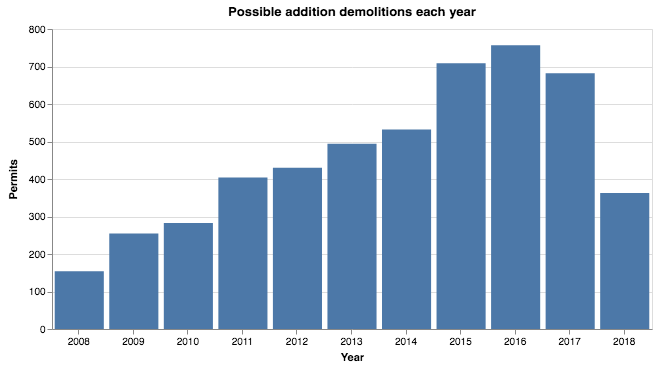

In [7]:
# make chart
alt.Chart(demos_by_year.reset_index(), title="Possible addition demolitions each year").mark_bar().encode(
    x=alt.X("Year:O", axis=alt.Axis(title="Year", labelAngle=0)),
    y=alt.Y("Count:Q", axis=alt.Axis(title="Permits")),
).properties(width=600)

## Partial demos by zip code

In [8]:
# make a datafram with counts of permits by zip code
demos_by_zip = demolitions.OriginalZip.value_counts().reset_index()
demos_by_zip.columns = ['Zip', 'Count']
demos_by_zip.head()

,Zip,Count
0,78703,678
1,78704,650
2,78731,579
3,78757,534
4,78702,279


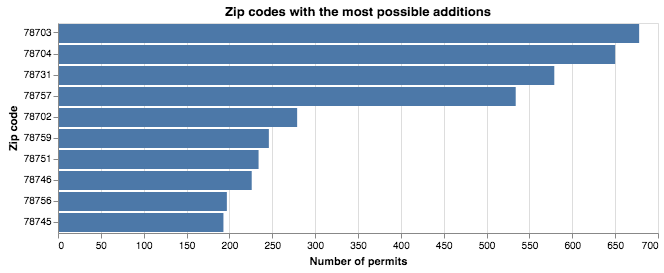

In [10]:
alt.Chart(demos_by_zip.head(10), title="Zip codes with the most possible additions").mark_bar().encode(
    x=alt.X("Count:Q",
            axis=alt.Axis(title="Number of permits")),
    y=alt.Y("Zip:O",
            # this is the sorting magic
            sort=alt.SortField(field="Count", order="descending", op="sum"),
            axis=alt.Axis(title="Zip code")),
).properties(width=600)

## Possible additions by zip by year

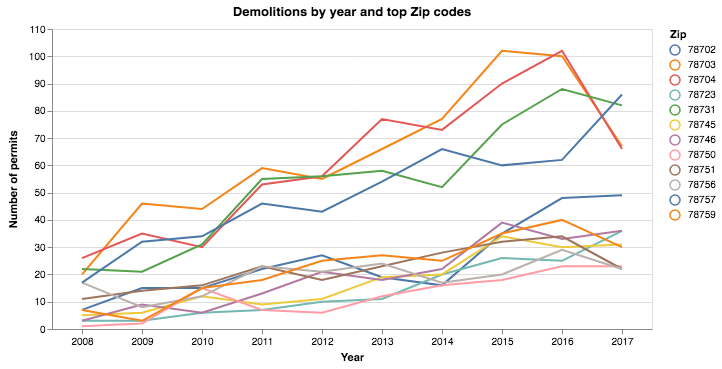

In [14]:
# Filter out 2018 because it is a partial year
before_2018 = demolitions[demolitions['CalendarYearIssued'] != '2018']

# build a dataframe of yr, zip, count
demos_yr_zip = before_2018.groupby(['CalendarYearIssued','OriginalZip']).agg(dict(
    PermitNum='count'
)).reset_index()
demos_yr_zip.columns = ['Year', 'Zip', 'Count']
demos_yr_zip.shape
# demos_yr_zip.head()

# filter to 2017
zips_2017 = demos_yr_zip[demos_yr_zip['Year'] == '2017']

# filter the 2017 list to those with 20+ demos
# sort the list by count descending
zips_2017_top = zips_2017[zips_2017.Count > 19].sort_values('Count', ascending=False)

# Use the Zip code column above to filter the original demos_yr_zip datatable
# and create the new dataframe to chart
top_demos_yr_zip_new = demos_yr_zip[demos_yr_zip['Zip'].isin(zips_2017_top.Zip)]

alt.Chart(top_demos_yr_zip_new, title="Demolitions by year and top Zip codes").mark_line().encode(
    x=alt.X("Year:O",
            axis=alt.Axis(title="Year", labelAngle=0)),
    y=alt.Y("Count:Q",
            axis=alt.Axis(title="Number of permits")),
    color="Zip"
).properties(width=600)